In [34]:
!pip install yfinance

In [35]:
!pip install get-all-tickers

In [36]:
!pip install ta

In [37]:
import yfinance as yf, pandas as pd, shutil, os, time, glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from get_all_tickers import get_tickers as gt
from ta import add_all_ta_features
from ta.utils import dropna

In [38]:
ticker = "AAPL"
tick = yf.Ticker(ticker)

In [39]:
hist = tick.history(period="4y")

In [40]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-08-17,102.98,103.23,102.26,103.09,25356000,0.0,0
2016-08-18,103.10,103.45,102.90,102.96,21984700,0.0,0
2016-08-19,102.66,103.53,102.28,103.22,25368100,0.0,0
2016-08-22,102.75,102.98,101.80,102.42,25820200,0.0,0
2016-08-23,102.50,103.18,102.44,102.74,21257700,0.0,0
...,...,...,...,...,...,...,...
2020-08-11,447.88,449.93,436.43,437.50,46975600,0.0,0
2020-08-12,441.99,453.10,441.19,452.04,41486200,0.0,0
2020-08-13,457.72,464.17,455.71,460.04,52520500,0.0,0


In [41]:
hist['Timestamp'] = hist.index.values

In [42]:
from ta import add_all_ta_features
df = add_all_ta_features(
    hist, open="Open", high="High", low="Low", close="Close", volume="Volume")

/usr/local/lib/python3.6/dist-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [43]:
df100 = df.iloc[100:]

In [44]:
cols = df.columns.values
features = cols[8:]


In [45]:
price = df100['Close'].values

In [46]:
df100 = df100[features].dropna(axis=1)

In [47]:
features = df100.columns.values

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df100.values)

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
newData=pca.fit_transform(X)

In [50]:
print(newData[0])

[-0.36331027 -1.77721018  0.18085559]


In [51]:
initial = price[0]
ratio = price / initial
Y = ratio [1:]

In [52]:
X = newData[:-1]
currentX = newData[-1]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [55]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %f'
      % mean_squared_error(y_test, y_pred))


Mean squared error: 0.003713


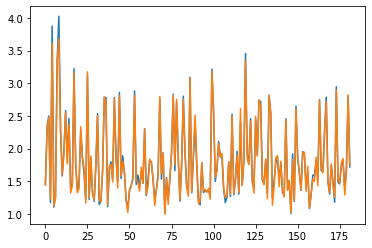

In [56]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)
plt.show()